# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

657

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Testing the API with London to see what the response data looks like
response = requests.get(f"{url}London&&units=imperial&APPID={api_key}")
print(response.url)
data = response.json()
pprint(data)

http://api.openweathermap.org/data/2.5/weather?q=London&&units=imperial&APPID=482f0bce7aa613e189f5dd3c3852eeca
{'base': 'stations',
 'clouds': {'all': 11},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1568524709,
 'id': 2643743,
 'main': {'humidity': 93,
          'pressure': 1025,
          'temp': 48.52,
          'temp_max': 55,
          'temp_min': 42.01},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1417,
         'message': 0.0093,
         'sunrise': 1568525690,
         'sunset': 1568571431,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'}],
 'wind': {'speed': 2.24}}


In [4]:
#lists for city name, lat, lon, temp, humidity, windspeed, cloudiness, skipped cities
cityList = []
latList = []
lonList = []
tempList = []
humList = []
wsList = []
cldList = []
skips = []

#date when the data was collected
d = str(datetime.datetime.today())
d = d[:10]

i = 0
while len(latList) < 500:
    
    city = cities[i]
    
    response = requests.get(f"{url}{city}&units=imperial&APPID={api_key}")
    data = response.json()
    
    #was getting a 404 error for some cities so we skip them to build our list of 500
    if data['cod'] != '404':
        
        lat = data['coord']['lat']
        lon = data['coord']['lon']
        temp = data['main']['temp']
        hum = data['main']['humidity']
        ws = data['wind']['speed']
        cld = data['clouds']['all']
        
        #print data for each city
        print(f"{i+1}: {city} ({lat}, {lon})  Temp: {temp}  Cloudiness: {cld}  Humidity: {hum} Wind Speed: {ws}")
        
        #add data for each city to end of each list
        cityList.append(city)
        latList.append(lat)
        lonList.append(lon)
        tempList.append(temp)
        humList.append(hum)
        wsList.append(ws)
        cldList.append(cld)
        
    else:
        print(f"No data for {city} trying next city...")
        skips.append(city)
        
    i = i + 1
    
print(f"{len(skips)} cities skipped.")     
    

1: provideniya (64.42, -173.23)  Temp: 44.15  Cloudiness: 100  Humidity: 76 Wind Speed: 6.55
2: rikitea (-23.12, -134.97)  Temp: 68.63  Cloudiness: 59  Humidity: 76 Wind Speed: 15.61
3: hermanus (-34.42, 19.24)  Temp: 55.99  Cloudiness: 100  Humidity: 64 Wind Speed: 3
4: tuatapere (-46.13, 167.69)  Temp: 53.01  Cloudiness: 80  Humidity: 69 Wind Speed: 1.99
5: turukhansk (65.8, 87.96)  Temp: 35.69  Cloudiness: 94  Humidity: 65 Wind Speed: 10.2
No data for amderma trying next city...
7: bredasdorp (-34.53, 20.04)  Temp: 48.2  Cloudiness: 100  Humidity: 87 Wind Speed: 3.36
8: vanavara (60.35, 102.28)  Temp: 36.77  Cloudiness: 100  Humidity: 85 Wind Speed: 8.12
9: nanortalik (60.14, -45.24)  Temp: 37.49  Cloudiness: 12  Humidity: 92 Wind Speed: 1.97
10: kavaratti (10.57, 72.64)  Temp: 86  Cloudiness: 40  Humidity: 74 Wind Speed: 4.7
11: datong (40.09, 113.3)  Temp: 71.33  Cloudiness: 85  Humidity: 24 Wind Speed: 15.61
12: petropavlovsk-kamchatskiy (53.05, 158.65)  Temp: 51.8  Cloudiness: 7

97: tuktoyaktuk (69.44, -133.03)  Temp: 39.2  Cloudiness: 90  Humidity: 86 Wind Speed: 9.17
98: praia da vitoria (38.73, -27.07)  Temp: 68  Cloudiness: 75  Humidity: 94 Wind Speed: 10.67
99: kem (2.68, 33.77)  Temp: 74.39  Cloudiness: 17  Humidity: 63 Wind Speed: 3.71
No data for illoqqortoormiut trying next city...
101: mahebourg (-20.41, 57.7)  Temp: 73.06  Cloudiness: 75  Humidity: 83 Wind Speed: 4.7
102: alta floresta (-9.87, -56.08)  Temp: 74.57  Cloudiness: 25  Humidity: 41 Wind Speed: 0.81
103: coromandel (-18.47, -47.2)  Temp: 69.35  Cloudiness: 32  Humidity: 42 Wind Speed: 9.91
104: victoria (5.28, 115.24)  Temp: 87.64  Cloudiness: 75  Humidity: 74 Wind Speed: 3.36
105: goderich (43.74, -81.71)  Temp: 54  Cloudiness: 0  Humidity: 93 Wind Speed: 5.95
106: mount isa (-20.73, 139.49)  Temp: 87.8  Cloudiness: 0  Humidity: 10 Wind Speed: 5.82
107: nouadhibou (20.93, -17.03)  Temp: 73.13  Cloudiness: 14  Humidity: 75 Wind Speed: 16.44
108: ozernovskiy (51.5, 156.52)  Temp: 52.07  Cl

193: wangaratta (-36.36, 146.32)  Temp: 63.81  Cloudiness: 40  Humidity: 55 Wind Speed: 8.05
194: marietta (33.95, -84.55)  Temp: 70.88  Cloudiness: 1  Humidity: 88 Wind Speed: 1.34
195: burkburnett (34.1, -98.57)  Temp: 76.33  Cloudiness: 1  Humidity: 69 Wind Speed: 5.82
196: upernavik (72.79, -56.15)  Temp: 30.47  Cloudiness: 100  Humidity: 90 Wind Speed: 20.62
197: comodoro rivadavia (-45.87, -67.48)  Temp: 51.8  Cloudiness: 0  Humidity: 40 Wind Speed: 29.97
198: kavieng (-2.57, 150.8)  Temp: 80.87  Cloudiness: 80  Humidity: 82 Wind Speed: 19.26
199: okhotsk (59.36, 143.24)  Temp: 44.33  Cloudiness: 100  Humidity: 87 Wind Speed: 21.68
200: touros (-5.2, -35.46)  Temp: 73.4  Cloudiness: 40  Humidity: 94 Wind Speed: 3.36
No data for hurghada trying next city...
202: san cristobal (14.68, -86.92)  Temp: 65.93  Cloudiness: 72  Humidity: 94 Wind Speed: 3.33
203: mucurapo (10.67, -61.53)  Temp: 78.44  Cloudiness: 20  Humidity: 83 Wind Speed: 5.82
204: grand gaube (-20.01, 57.66)  Temp: 72

292: hlinsko (49.76, 15.91)  Temp: 45.48  Cloudiness: 0  Humidity: 93 Wind Speed: 2.24
293: noyabrsk (63.2, 75.45)  Temp: 43.79  Cloudiness: 99  Humidity: 81 Wind Speed: 12.73
294: hamilton (43.26, -79.87)  Temp: 58.39  Cloudiness: 20  Humidity: 100 Wind Speed: 4.7
295: tessalit (20.2, 1.01)  Temp: 89.87  Cloudiness: 6  Humidity: 20 Wind Speed: 12.91
296: damme (51.25, 3.28)  Temp: 49.01  Cloudiness: 1  Humidity: 93 Wind Speed: 4.7
297: yulara (-25.24, 130.99)  Temp: 91.4  Cloudiness: 0  Humidity: 6 Wind Speed: 5.82
No data for daxian trying next city...
No data for kemijarvi trying next city...
300: guerrero negro (27.97, -114.04)  Temp: 71.15  Cloudiness: 0  Humidity: 80 Wind Speed: 9.37
301: la orilla (18, -102.23)  Temp: 77.99  Cloudiness: 100  Humidity: 83 Wind Speed: 6.64
302: lianran (24.92, 102.47)  Temp: 77.41  Cloudiness: 40  Humidity: 56 Wind Speed: 11.18
303: yerbogachen (61.28, 108.01)  Temp: 39.65  Cloudiness: 99  Humidity: 75 Wind Speed: 12.03
304: katsuura (33.93, 134.5

393: beloha (-25.17, 45.06)  Temp: 74.75  Cloudiness: 0  Humidity: 53 Wind Speed: 3.22
394: nanticoke (41.21, -76)  Temp: 62.1  Cloudiness: 75  Humidity: 93 Wind Speed: 1.52
395: muravlenko (63.79, 74.5)  Temp: 41.99  Cloudiness: 100  Humidity: 84 Wind Speed: 17.45
396: port hardy (50.7, -127.42)  Temp: 55.4  Cloudiness: 90  Humidity: 93 Wind Speed: 3.36
397: ilebo (-4.33, 20.59)  Temp: 73.85  Cloudiness: 100  Humidity: 90 Wind Speed: 2.53
398: kattivakkam (13.22, 80.32)  Temp: 87.8  Cloudiness: 40  Humidity: 66 Wind Speed: 9.17
399: zhoucheng (31.35, 119.33)  Temp: 80.6  Cloudiness: 40  Humidity: 57 Wind Speed: 6.71
400: gizo (31.8, 34.94)  Temp: 75.79  Cloudiness: 20  Humidity: 65 Wind Speed: 8.05
401: deputatskiy (69.3, 139.9)  Temp: 37.67  Cloudiness: 100  Humidity: 85 Wind Speed: 6.2
402: bubaque (11.28, -15.83)  Temp: 81.59  Cloudiness: 100  Humidity: 79 Wind Speed: 7.4
403: hauterive (49.18, -68.27)  Temp: 57.16  Cloudiness: 90  Humidity: 100 Wind Speed: 17.22
404: namtsy (62.72

491: bluefield (37.27, -81.22)  Temp: 63.75  Cloudiness: 1  Humidity: 63 Wind Speed: 1.61
492: waipawa (-39.94, 176.59)  Temp: 52  Cloudiness: 0  Humidity: 64 Wind Speed: 10
493: hoquiam (46.98, -123.89)  Temp: 60.85  Cloudiness: 90  Humidity: 100 Wind Speed: 16.11
494: hami (42.84, 93.51)  Temp: 75.83  Cloudiness: 0  Humidity: 11 Wind Speed: 4.81
495: cinco esquinas (-32.95, -60.68)  Temp: 53.82  Cloudiness: 0  Humidity: 87 Wind Speed: 4.7
496: oistins (13.07, -59.53)  Temp: 82.4  Cloudiness: 40  Humidity: 78 Wind Speed: 12.75
No data for krasnoselkup trying next city...
498: jumla (29.28, 82.18)  Temp: 67.37  Cloudiness: 98  Humidity: 69 Wind Speed: 2.21
499: westport (41.14, -73.36)  Temp: 68.72  Cloudiness: 75  Humidity: 100 Wind Speed: 3.04
500: dingle (11, 122.67)  Temp: 84.65  Cloudiness: 92  Humidity: 70 Wind Speed: 10.74
501: sangmelima (2.93, 11.98)  Temp: 68.45  Cloudiness: 100  Humidity: 98 Wind Speed: 2.62
No data for da nang trying next city...
503: alekseyevsk (57.84, 10

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create a dataframe from our lists
data_df = pd.DataFrame({
    'City': cityList,
    'Lat': latList,
    'Lon': lonList,
    'Temp(F)': tempList,
    'Humidity%': humList,
    'Wind Speed': wsList,
    'Cloudiness%': cldList
    
})
data_df.head()

,City,Lat,Lon,Temp(F),Humidity%,Wind Speed,Cloudiness%
0,provideniya,64.42,-173.23,44.15,76,6.55,100
1,rikitea,-23.12,-134.97,68.63,76,15.61,59
2,hermanus,-34.42,19.24,55.99,64,3.00,100
3,tuatapere,-46.13,167.69,53.01,69,1.99,80
4,turukhansk,65.80,87.96,35.69,65,10.20,94


In [6]:
#export to CSV file
data_df.to_csv("cityWeather.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

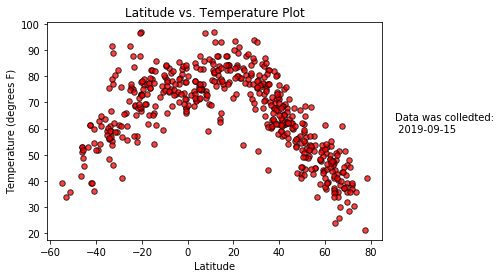

In [12]:
x_axis = data_df['Lat']
temp = data_df['Temp(F)']
plt.scatter(x_axis, temp, marker="o", facecolors="red", edgecolors="black",
            s=30, alpha=0.75)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (degrees F)")
plt.savefig('tempPlot.png')
side_text = plt.figtext(0.93, 0.5, f'Data was colledted: \n {d}')

#### Latitude vs. Humidity Plot

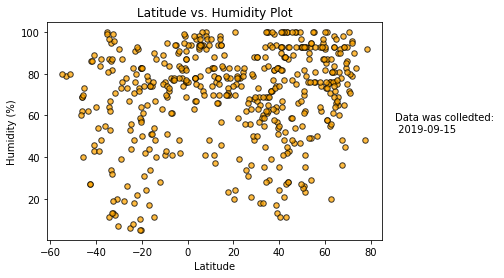

In [13]:
x_axis = data_df['Lat']
hum = data_df['Humidity%']
plt.scatter(x_axis, hum, marker="o", facecolors="orange", edgecolors="black",
            s=30, alpha=0.75)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('humPlot.png')
side_text = plt.figtext(0.93, 0.5, f'Data was colledted: \n {d}')

#### Latitude vs. Cloudiness Plot

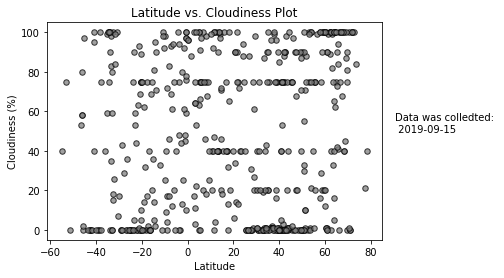

In [14]:
x_axis = data_df['Lat']
cld = data_df['Cloudiness%']
plt.scatter(x_axis, cld, marker="o", facecolors="grey", edgecolors="black",
            s=30, alpha=0.75)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('cldPlot.png')
side_text = plt.figtext(0.93, 0.5, f'Data was colledted: \n {d}')

#### Latitude vs. Wind Speed Plot

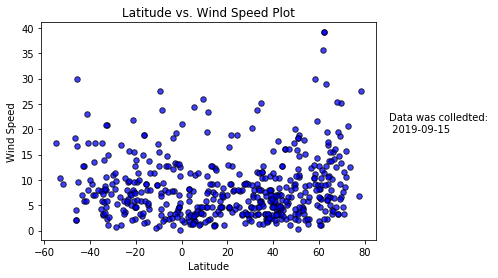

In [15]:
x_axis = data_df['Lat']
ws = data_df['Wind Speed']
plt.scatter(x_axis, ws, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('wsPlot.png')
side_text = plt.figtext(0.93, 0.5, f'Data was colledted: \n {d}')